<h2>Code-Beispiel: Markerbasierte Posenbestimmung</h2>
<font size="3" face="Verdana">
<p style="text-align:justify">Im folgenden befindet sich eine Implementierung der markerbasierten Posenbestimmung. </p>
<p style="text-align:justify">Dazu muss jedoch zuerst in den nachstehenden Code-Block geklickt werden und dieser durch drücken der "Run" Taste in der Leiste oben ausgeführt werden. </p> 
</font>

0) Originalbild


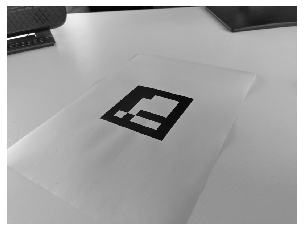

1) Binärbild


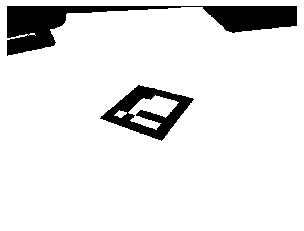

2) Umrisse


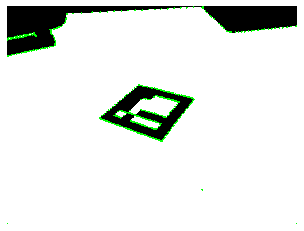

3) Eckpunkte der vereinfachten Umrisse, welche Markerkandidaten darstellen


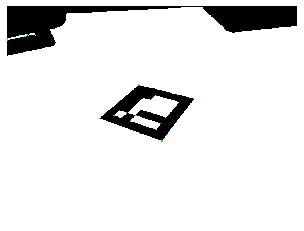

3) Homographie berechnen und auf die Bildbereiche mit potentiellen Markern anwenden:


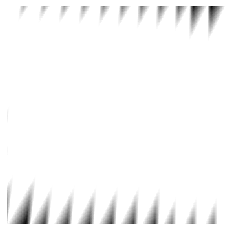

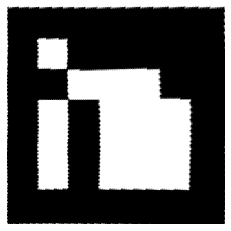

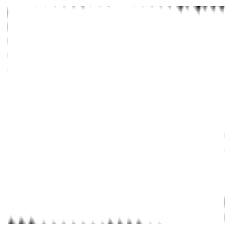

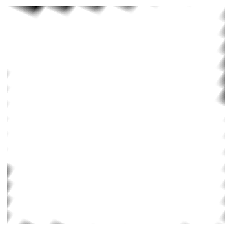

4) Kandidaten mit dem original Marker vergleichen:
Prozentualer Unterschied der Bits:
Kandidat 1: 0.6786447005785029
Kandidat 2: 0.02960314874657697
Kandidat 3: 0.6818233849025702
Kandidat 4: 0.6808019794133963


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2


#lies Bild als Grauwertbild ein und zeige es an
print("0) Originalbild")
img = cv2.imread('Markerbild.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.show()


#1) Wandle das Bild in ein Binärbild um mit Threshold 127 / 0.5
threshold = 127
img_bin = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)[1]
print("1) Binärbild")
plt.imshow(img_bin, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.axis("off")
plt.show()


#2) Berechnen der Umrisse
contours = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
print("2) Umrisse")
img_rgb = cv2.cvtColor(img_bin,cv2.COLOR_GRAY2RGB)
for cont in contours:
    cv2.drawContours(img_rgb, cont, -1, (0,255,0), 3)
plt.figure()
plt.imshow(img_rgb)
plt.axis("off")
plt.show()


# Vereinfachen der Umrisse & 3) Finde Markerkandidaten
numVierEcken = 0
kandidaten = []
img_rgb2 = cv2.cvtColor(img_bin,cv2.COLOR_GRAY2RGB)
for cont in contours:
    approx = cv2.approxPolyDP(cont, 1.9, True)
    
    if len(approx) == 4:
        numVierEcken = numVierEcken+1
        kandidaten.append(approx)
        cv2.drawContours(img_rgb2, approx, -1, (0,255,0), 3)
     
print("3) Eckpunkte der vereinfachten Umrisse, welche Markerkandidaten darstellen")
plt.figure()
plt.imshow(img_rgb2)
plt.axis("off")
plt.show()
        



#4) Muster überprüfen
print("3) Homographie berechnen und auf die Bildbereiche mit potentiellen Markern anwenden:")
musterImg = cv2.imread('marker.png',cv2.IMREAD_GRAYSCALE)
height,width = musterImg.shape[:2]
muster = np.array([[0,0],[height,0],[height,width], [0,width]])
trans_images = []
for kan in kandidaten:
    H = cv2.findHomography(kan, muster)
    rows,cols = img_bin.shape
    dst = cv2.warpPerspective(img_bin, H[0], (width,height))
    trans_images.append(dst)

#Zeige die transformierten Bildausschnitte
for i in trans_images:
    plt.figure()
    plt.imshow(i, cmap='gray')
    plt.axis("off")
    plt.show()

print("4) Kandidaten mit dem original Marker vergleichen:")
#Bitweiser Vergleich zwischen Markerkandidaten und echtem Marker
original_bit_id = []
muster_bin = cv2.threshold(musterImg, threshold, 255, cv2.THRESH_BINARY)[1]
for h in range(height):
    for w in range(width):
        if muster_bin[h][w] == 0:
            original_bit_id.append(0)
        else:
            original_bit_id.append(1)

bit_ids = []
diffs = []
d=0
for i in trans_images:
    bit_id = []
    i_bin = cv2.threshold(i, threshold, 255, cv2.THRESH_BINARY)[1]
    for h in range(height):
        for w in range(width):
            if i_bin[h][w] == 0:
                bit_id.append(0)
            else:
                bit_id.append(1)
    bit_ids.append(bit_id)
    diffs.append(0)
    #Vergleich mit Muster
    for j in range(height*width):
        if bit_ids[d][j] != original_bit_id[j]:
            diffs[d] = diffs[d] + 1
    d = d+1

print("Prozentualer Unterschied der Bits:")
print("Kandidat 1: " + str(diffs[0]/(height*width)))
print("Kandidat 2: " + str(diffs[1]/(height*width)))
print("Kandidat 3: " + str(diffs[2]/(height*width)))
print("Kandidat 4: " + str(diffs[3]/(height*width)))


    

